In [1]:
using Plots
using LabelledArrays
import DifferentialEquations as de
using DifferentialEquations
using Sundials
using DiffEqSensitivity
using ForwardDiff

In [4]:
function rate!(dc, c, p, t)
    k1 = p[1]
    k2 = p[2]
    dc[1] = -k1 * c[1]
    dc[2] = k1 * c[1] - k2 * c[2]
    dc[3] = k2 * c[2]
end

rate! (generic function with 1 method)

In [49]:
c0 = [1.0, 0.0, 0.0]
p = [2.0, 1.0]
tspan = (0.0, 5.0)

prob = ODEProblem(rate!, c0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 5.0)
u0: 3-element Vector{Float64}:
 1.0
 0.0
 0.0

In [50]:
function cprofile(p)
    _prob = remake(prob, p = p)
    Array(de.solve(_prob, Rodas4(), saveat = 0.1))
end

cprofile (generic function with 1 method)

In [51]:
cprofile([2.0, 1.0])

3×51 Matrix{Float64}:
 1.0  0.818731    0.67032    0.548812   …  6.78282e-5  5.55113e-5  4.54488e-5
 0.0  0.172213    0.296821   0.384012      0.0163249   0.0147826   0.0133854
 0.0  0.00905591  0.0328585  0.0671756     0.983607    0.985162    0.986569

In [52]:
csens = ForwardDiff.jacobian(cprofile, [2.0; 1.0])

153×2 Matrix{Float64}:
  0.0           0.0
  0.0           0.0
  0.0           0.0
 -0.0818731     0.0
  0.0776395    -0.00875416
  0.0042336     0.00875416
 -0.134064      0.0
  0.119717     -0.0306709
  0.0143467     0.0306709
 -0.164643      0.0
  0.137279     -0.0604784
  0.0273635     0.0604784
 -0.17973       0.0
  ⋮            
 -0.000389033   0.0
 -0.00823471   -0.0674698
  0.00862374    0.0674698
 -0.000325428   0.0
 -0.00751169   -0.0626809
  0.00783712    0.0626809
 -0.000272119   0.0
 -0.0068476    -0.0581935
  0.00711972    0.0581935
 -0.000227251   0.0
 -0.0062384    -0.0539936
  0.00646565    0.0539936

In [53]:
csens_a = csens[1:3:153,:]
csens_b = csens[2:3:153,:]
csens_c = csens[3:3:153,:]

51×2 Matrix{Float64}:
 0.0         0.0
 0.0042336   0.00875416
 0.0143467   0.0306709
 0.0273635   0.0604784
 0.0412602   0.094275
 0.0547125   0.12923
 0.0669008   0.163339
 0.077371    0.195244
 0.0859164   0.224064
 0.092502    0.249284
 0.09721     0.270674
 0.100185    0.288181
 0.101615    0.301916
 ⋮           
 0.018234    0.118221
 0.0166381   0.110562
 0.0151717   0.103298
 0.0138261   0.0964202
 0.0125927   0.0899196
 0.0114635   0.0837858
 0.0104302   0.0780085
 0.00948597  0.0725742
 0.00862374  0.0674698
 0.00783712  0.0626809
 0.00711972  0.0581935
 0.00646565  0.0539936

In [54]:
k1 = 2.0
k2 = 1.0
csens_a_k1 = [-t*exp(-k1*t) for t in tprofile]
csens_a_k2 = zeros(length(tprofile))

51-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [55]:
csens_b_k1 = (k2/(k2 - k1)^2).*(exp.(-k1.*tprofile) - exp.(-k2.*tprofile)) - (k1.* tprofile)/(k2 - k1).*exp.(-k1.*tprofile)
csens_b_k2 = -(k1/(k2 - k1)^2).*(exp.(-k1.*tprofile) - exp.(-k2.*tprofile)) + (k1 .* tprofile)/(k2 - k1).*exp.(-k2.*tprofile)

51-element Vector{Float64}:
 -0.0
 -0.008754153691236527
 -0.030670887146507786
 -0.06047776323364795
 -0.094273872991676
 -0.12922822263025124
 -0.16333911494918307
 -0.19524274560836724
 -0.22406145034242214
 -0.2492838444950533
 -0.2706705664732254
 -0.2881805334642837
 -0.3019135913437059
  ⋮
 -0.11822255634362505
 -0.1105647585882101
 -0.10329989463086404
 -0.096421426299415
 -0.08992070106786132
 -0.08378737749105633
 -0.0780097953758695
 -0.072575296165036
 -0.06747049868366231
 -0.06268153504553393
 -0.0581942511520742
 -0.05399437585220871

In [56]:
csens_c_k1 = -csens_a_k1 - csens_b_k1
csens_c_k2 = -csens_a_k2 - csens_b_k2

51-element Vector{Float64}:
 0.0
 0.008754153691236527
 0.030670887146507786
 0.06047776323364795
 0.094273872991676
 0.12922822263025124
 0.16333911494918307
 0.19524274560836724
 0.22406145034242214
 0.2492838444950533
 0.2706705664732254
 0.2881805334642837
 0.3019135913437059
 ⋮
 0.11822255634362505
 0.1105647585882101
 0.10329989463086404
 0.096421426299415
 0.08992070106786132
 0.08378737749105633
 0.0780097953758695
 0.072575296165036
 0.06747049868366231
 0.06268153504553393
 0.0581942511520742
 0.05399437585220871

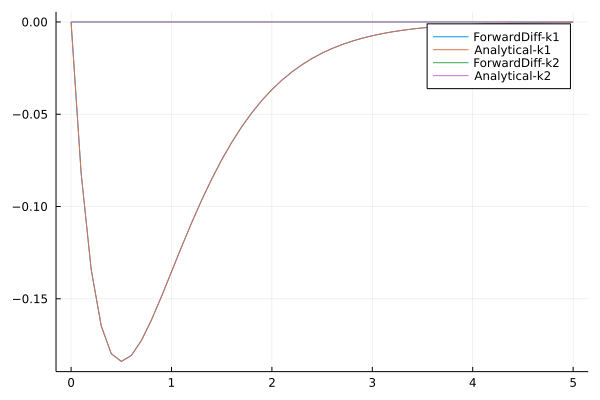

In [57]:
tprofile = collect(0:0.1:5.0)
plot(tprofile, [csens_a[:,1], csens_a_k1, csens_a[:,2], csens_a_k2], labels = ["ForwardDiff-k1" "Analytical-k1" "ForwardDiff-k2" "Analytical-k2"])

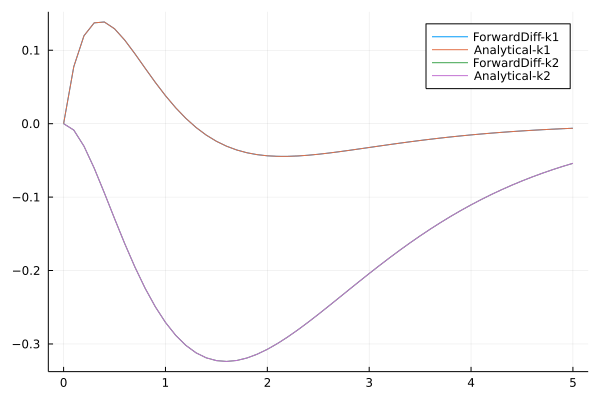

In [58]:
plot(tprofile, [csens_b[:,1], csens_b_k1, csens_b[:,2], csens_b_k2], labels = ["ForwardDiff-k1" "Analytical-k1" "ForwardDiff-k2" "Analytical-k2"])

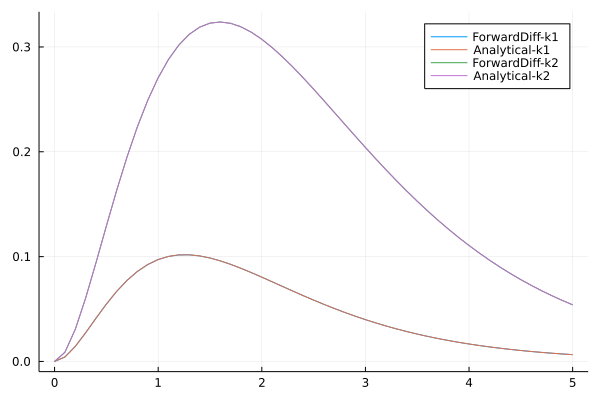

In [59]:
plot(tprofile, [csens_c[:,1], csens_c_k1, csens_c[:,2], csens_c_k2], labels = ["ForwardDiff-k1" "Analytical-k1" "ForwardDiff-k2" "Analytical-k2"])